In [2]:
import numpy as np
from fashion_mnist.utils import mnist_reader
import matplotlib.pyplot as plt
import pickle

In [5]:
X_train, y_train = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='t10k')

In [6]:
labelDct = {0:"top", 1:"trousers", 2: "pullover", 3:"dress", 4: "coat", 5: "sandal", 6:"shirt", 7:"sneaker",8:"bag",9:"boot"}

dim = len(X_train[0])

In [110]:
def trainPerceptron(X_train, y_train, classPair):

    aIndices = []
    bIndices = []

    for index, value in enumerate(y_train):
        if value == classPair[0]:
            aIndices.append([index,-1])
        elif value == classPair[1]:
            bIndices.append([index,1])


    trainingIndices = aIndices + bIndices

    w = np.zeros(dim + 1)
    notLinearlySeparated = True

    iterations = 0
    while notLinearlySeparated:
        m = 0
        for pair in trainingIndices:

            index = pair[0]
            y = pair[1]
            x = np.append(X_train[index],1)

            if y * np.dot(w,x) <= 0:
                w += y*x
                m += 1

        iterations += 1

        if m == 0:
            notLinearlySeparated = False
            print("Separated training data in {} iterations!".format(iterations))
        elif iterations > 100:
            print("Failed to separate data over {} iterations!".format(iterations))
            break

    return w, notLinearlySeparated

def trainModifiedPerceptron(X_train, y_train, classPair):

    aIndices = []
    bIndices = []

    for index, value in enumerate(y_train):
        if value == classPair[0]:
            aIndices.append([index,-1])
        elif value == classPair[1]:
            bIndices.append([index,1])


    trainingIndices = aIndices + bIndices

    w = np.zeros(dim + 1)
    notLinearlySeparated = True

    iterations = 0
    while notLinearlySeparated:
        m = 0
        mMin = 100
        for pair in trainingIndices:

            index = pair[0]
            y = pair[1]
            x = np.append(X_train[index],1)

            if y * np.dot(w,x) <= 0:
                w += y*x
                m += 1
                
        if m <= mMin:
            mMin = m
            wBest = w
            
        
        iterations += 1
        
        if m == 0:
            notLinearlySeparated = False
            print("Separated training data in {} iterations!".format(iterations))
        elif iterations > 250:
            w = wBest
            print("Failed to separate data over {} iterations; mMin was {}!".format(iterations, mMin))
            break

    return w, notLinearlySeparated

def testPerceptron(w, X_test, y_test, classPair):
    
    aTestIndices = []
    bTestIndices = []

    for index, value in enumerate(y_test):
        if value == classPair[0]:
            aTestIndices.append([index,-1])
        elif value == classPair[1]:
            bTestIndices.append([index,1])

    testIndices =  aTestIndices + bTestIndices

    correct = 0
    incorrect = 0

    for pair in testIndices:

        index = pair[0]
        y = pair[1]
        x = np.append(X_test[index],1)

        if y*np.dot(w,x) > 0:
            correct += 1
        else:
            incorrect += 1

    percScore = correct/(correct+incorrect)
    return percScore

def evalClassPair(classPair, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    
    w, unseparable = trainPerceptron(X_train, y_train, classPair)

    if unseparable:
        score = 0
    else:
        score = testPerceptron(w, X_test, y_test, classPair)
    print("The class pair [{},{}] scored {}%!".format(labelDct[classPair[0]],labelDct[classPair[1]],round(score*100,2)))
    return score

def evalModifiedClassPair(classPair, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    
    w, unseparable = trainModifiedPerceptron(X_train, y_train, classPair)
    
    score = testPerceptron(w, X_test, y_test, classPair)
    
    print("The class pair [{},{}] scored {}%!".format(labelDct[classPair[0]],labelDct[classPair[1]],round(score*100,2)))
    return score

In [97]:
classPairList = []
for i in labelDct.keys():
    for j in labelDct.keys():
        if j > i:
            classPairList.append([i,j])

In [99]:
scoresArray = np.zeros((10,10))
for classPair in classPairList:
    score = evalClassPair(classPair)
    scoresArray[classPair[0],classPair[1]] = score
    print(scoresArray[classPair[0],classPair[1]])

Failed to separate data over 101 iterations!
The class pair [top,trousers] scored 0%!
0.0
Failed to separate data over 101 iterations!
The class pair [top,pullover] scored 0%!
0.0
Failed to separate data over 101 iterations!
The class pair [top,dress] scored 0%!
0.0
Failed to separate data over 101 iterations!
The class pair [top,coat] scored 0%!
0.0
Separated training data in 48 iterations!
The class pair [top,sandal] scored 99.75%!
0.9975
Failed to separate data over 101 iterations!
The class pair [top,shirt] scored 0%!
0.0
Separated training data in 17 iterations!
The class pair [top,sneaker] scored 99.95%!
0.9995
Failed to separate data over 101 iterations!
The class pair [top,bag] scored 0%!
0.0
Separated training data in 19 iterations!
The class pair [top,boot] scored 99.95%!
0.9995
Failed to separate data over 101 iterations!
The class pair [trousers,pullover] scored 0%!
0.0
Failed to separate data over 101 iterations!
The class pair [trousers,dress] scored 0%!
0.0
Failed to sep

In [103]:
with open('mustBeSeparate.p', 'wb') as fp:
    pickle.dump(scoresArray, fp)

In [112]:
scoresArray = np.zeros((10,10))
for classPair in classPairList:
    score = evalModifiedClassPair(classPair)
    scoresArray[classPair[0],classPair[1]] = score
    print(scoresArray[classPair[0],classPair[1]])
    
with open('bestWeightsAlgo.p', 'wb') as fp:
    pickle.dump(scoresArray, fp)    

Failed to separate data over 251 iterations; mMin was 12!
The class pair [top,trousers] scored 89.7%!
0.897
Failed to separate data over 251 iterations; mMin was 15!
The class pair [top,pullover] scored 60.35%!
0.6035
Failed to separate data over 251 iterations; mMin was 19!
The class pair [top,dress] scored 56.1%!
0.561
Failed to separate data over 251 iterations; mMin was 11!
The class pair [top,coat] scored 88.0%!
0.88
Separated training data in 48 iterations!
The class pair [top,sandal] scored 99.75%!
0.9975
Failed to separate data over 251 iterations; mMin was 15!
The class pair [top,shirt] scored 50.6%!
0.506
Separated training data in 17 iterations!
The class pair [top,sneaker] scored 99.95%!
0.9995
Failed to separate data over 251 iterations; mMin was 14!
The class pair [top,bag] scored 87.05%!
0.8705
Separated training data in 19 iterations!
The class pair [top,boot] scored 99.95%!
0.9995
Failed to separate data over 251 iterations; mMin was 11!
The class pair [trousers,pullov

AttributeError: 'AxesImage' object has no attribute 'set_figheight'

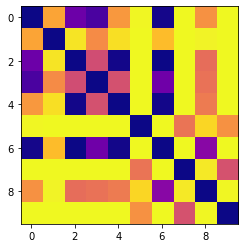

In [125]:
plt.imshow(symmetricBestWeights*100, vmin = 50, vmax = 100, cmap = 'plasma') 
fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title("Error matrix")
fig.tight_layout()
plt.show()

In [8]:
with open('mustBeSeparate.p', 'rb') as fp:
    separateScores = pickle.load(fp)
symmetricSeparateScores = (separateScores + np.transpose(separateScores))*100

print(symmetricSeparateScores)

with open('bestWeightsAlgo.p', 'rb') as fp:
    bestWeightsArray = pickle.load(fp)
symmetricBestWeights = (bestWeightsArray + np.transpose(bestWeightsArray))*100

[[  0.     0.     0.     0.     0.    99.75   0.    99.95   0.    99.95]
 [  0.     0.     0.     0.     0.    99.9    0.    99.95   0.    99.95]
 [  0.     0.     0.     0.     0.    99.95   0.   100.     0.    99.95]
 [  0.     0.     0.     0.     0.    99.9    0.   100.     0.    99.95]
 [  0.     0.     0.     0.     0.    99.95   0.   100.     0.   100.  ]
 [ 99.75  99.9   99.95  99.9   99.95   0.    99.9    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    99.9    0.   100.     0.    99.95]
 [ 99.95  99.95 100.   100.   100.     0.   100.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.    99.75]
 [ 99.95  99.95  99.95  99.95 100.     0.    99.95   0.    99.75   0.  ]]


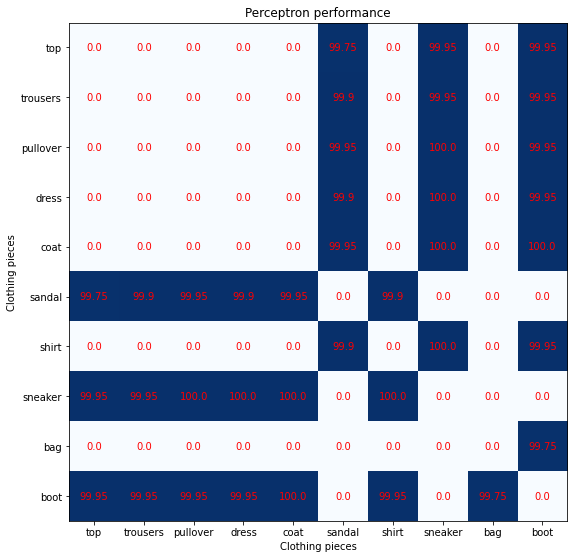

In [11]:
fig, ax = plt.subplots()        

for i in range(0,10):
    for j in range(0,10):
        
        text = ax.text(j, i, round(symmetricSeparateScores[i, j],3),
               ha="center", va="center", color="r")
        
ax.imshow(symmetricSeparateScores, cmap = 'Blues', vmin = 50, vmax = 100)    

# We want to show all ticks...
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
# ... and label them with the respective list entries
ax.set_xticklabels([labelDct[key] for key in labelDct.keys()])
ax.set_yticklabels([labelDct[key] for key in labelDct.keys()])
ax.set_ylabel("Clothing pieces")
ax.set_xlabel("Clothing pieces")

fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title("Perceptron performance")
fig.tight_layout()
plt.show()

#plt.imshow(loadedScores*100, cmap = 'Blues', vmin = 95, vmax = 100) 
#plt.show()

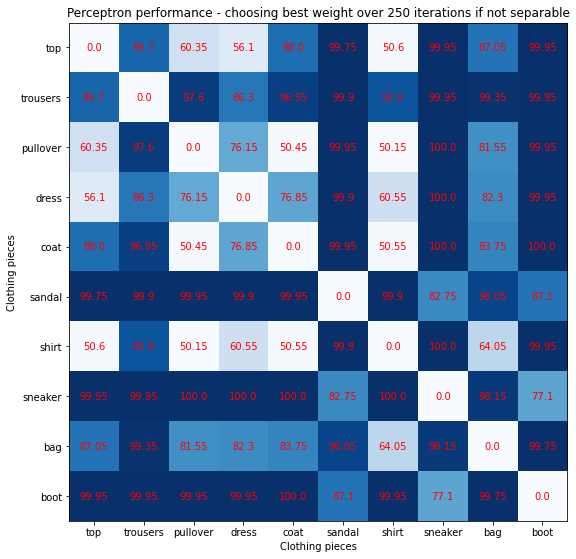

In [13]:
fig, ax = plt.subplots()        

for i in range(0,10):
    for j in range(0,10):
        
        text = ax.text(j, i, round(symmetricBestWeights[i, j],3),
               ha="center", va="center", color="r")
        
ax.imshow(symmetricBestWeights, cmap = 'Blues', vmin = 50, vmax = 100)    

# We want to show all ticks...
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
# ... and label them with the respective list entries
ax.set_xticklabels([labelDct[key] for key in labelDct.keys()])
ax.set_yticklabels([labelDct[key] for key in labelDct.keys()])
ax.set_ylabel("Clothing pieces")
ax.set_xlabel("Clothing pieces")

fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title("Perceptron performance - choosing best weight over 250 iterations if not separable")
fig.tight_layout()
plt.show()

#plt.imshow(loadedScores*100, cmap = 'Blues', vmin = 95, vmax = 100) 
#plt.show()